## Numpy

In [2]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [7]:
import random
def normalarray():
    return [random.random()+1 for i in range(10000)]


In [8]:
def nparray():
    return np.random.rand(10000)+1


In [9]:
%%timeit
normalarray()

735 µs ± 7.27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
%%timeit
nparray()

68 µs ± 911 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [16]:
from math import sin, cos

def normalsum(a):
    return [sin(i)+cos(i) for i in a]
def npsum(a):
    return np.sin(a)+np.cos(a)

In [25]:
a=np.arange(1,1000)


In [26]:
%%timeit
normalsum(a)

183 µs ± 7.74 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [27]:
%%timeit
npsum(a)

18 µs ± 697 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [28]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

In [35]:
def cube_sum2(x):
    x=np.array(x)
    return np.sum(np.power(x,3))
def almost_variance2(x):
    x=np.array(x)
    return np.sum(np.power(x-np.mean(x),4))/len(x)

In [38]:
a=np.arange(1,100)


In [39]:
%%timeit
cube_sum(a)

16.4 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [40]:
%%timeit
cube_sum2(a)

5.84 µs ± 910 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [41]:
%%timeit
almost_variance(a)

41.7 µs ± 2.04 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [42]:
%%timeit
almost_variance2(a)

20.5 µs ± 4.14 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [10]:
(np.arange(0,10)+np.ones((10,10))).T*(np.arange(0,10)+np.ones((10,10)))

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       [  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.],
       [  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.],
       [  4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.],
       [  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.],
       [  6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.],
       [  7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.],
       [  8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.],
       [  9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.],
       [ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]])

### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [3]:
def norm_matr():
    a=np.random.rand(10,5)
    return np.sum(a**2,axis=1) -2*a@a.T + np.sum(a**2,axis=1).reshape(-1,1)


array([[ 0.00000000e+00,  7.15646415e-01,  1.18495348e+00,
         1.15483028e+00,  4.41633701e-01,  4.58790438e-01,
         8.41261347e-01,  4.89740493e-01,  6.12301237e-01,
         4.56626105e-01],
       [ 7.15646415e-01, -8.88178420e-16,  6.81973648e-01,
         1.45686497e+00,  3.19817934e-01,  9.55988449e-01,
         5.31425980e-01,  7.48280529e-01,  8.15881389e-01,
         2.43884497e-01],
       [ 1.18495348e+00,  6.81973648e-01,  0.00000000e+00,
         9.79443473e-01,  8.29583514e-01,  8.36701676e-01,
         4.04037703e-01,  1.62083317e+00,  9.81088999e-01,
         3.64321757e-01],
       [ 1.15483028e+00,  1.45686497e+00,  9.79443473e-01,
         0.00000000e+00,  1.65119694e+00,  1.08363790e+00,
         1.77388914e+00,  1.30981942e+00,  4.98852513e-01,
         7.94154994e-01],
       [ 4.41633701e-01,  3.19817934e-01,  8.29583514e-01,
         1.65119694e+00, -8.88178420e-16,  3.19153265e-01,
         7.24364136e-01,  9.14952382e-01,  8.77196276e-01,
         3.

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [14]:
a=np.array([[0,1],
          [2,3],
          [4,5],
          [6,7],
          [8,9]])
x=(a-np.mean(a,axis=0,keepdims=True))/np.std(a,axis=0,keepdims=True)
x

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [5]:
a=np.array([1,-4,3])
x=1.5
def closest(x,A):
    return A.flatten()[np.argmin(np.abs(x-A))]
closest(x, a)



1

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [8]:
x=2
a=np.array([1,1,1,1,1])
def poly(x,a):
    return np.sum(a*np.cumprod(np.concatenate(([1],np.full(a.shape[0]-1,x)))))
poly(x,a)

31

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

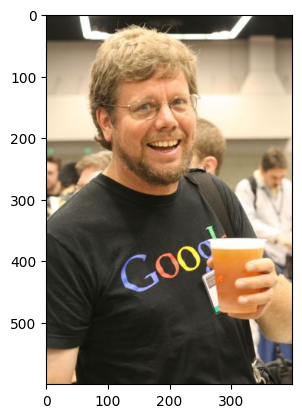

In [10]:
img = mpimg.imread('./images/Guido_van_Rossum.jpg')
plt.imshow(img);


### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

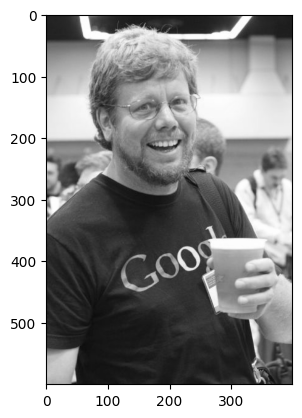

In [13]:
def gray_image(img):
    r=np.array(img[:,:,0])*0.2126
    g=np.array(img[:,:,1])*0.7152
    b=np.array(img[:,:,2])*0.0722
    g_image=img.copy()
    for i in range(3):
        g_image[:,:,i]=r+g+b

    return g_image

gray=gray_image(img)
plt.imshow(gray)
plt.show()

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [16]:
x1=np.array([1,2,3])
x2=np.array([4,5,6])
def interpolate(x1,x2):
    x1=x1.reshape(-1,1)
    x2=x2.reshape(-1,1)
    lambd=np.linspace(0,1,10).reshape(-1,1).T
    return (x1*lambd+x2*(1-lambd)).T
interpolate(x1,x2)

(10,)


array([[4.        , 5.        , 6.        ],
       [3.66666667, 4.66666667, 5.66666667],
       [3.33333333, 4.33333333, 5.33333333],
       [3.        , 4.        , 5.        ],
       [2.66666667, 3.66666667, 4.66666667],
       [2.33333333, 3.33333333, 4.33333333],
       [2.        , 3.        , 4.        ],
       [1.66666667, 2.66666667, 3.66666667],
       [1.33333333, 2.33333333, 3.33333333],
       [1.        , 2.        , 3.        ]])